## 📖 Background
You work for an international HR consultancy helping companies attract and retain top talent in the competitive tech industry. As part of your services, you provide clients with insights into industry salary trends to ensure they remain competitive in hiring and compensation practices.

Your team wants to use a data-driven approach to analyse how various factors—such as job role, experience level, remote work, and company size—impact salaries globally. By understanding these trends, you can advise clients on offering competitive packages to attract the best talent.

In this competition, you’ll explore and visualise salary data from thousands of employees worldwide. f you're tackling the advanced level, you'll go a step further—building predictive models to uncover key salary drivers and providing insights on how to enhance future data collection.

## 💾 The data

The data comes from a survey hosted by an HR consultancy, available in `'salaries.csv'`.

#### Each row represents a single employee's salary record for a given year:
- **`work_year`** - The year the salary was paid.  
- **`experience_level`** - Employee experience level:  
  - **`EN`**: Entry-level / Junior  
  - **`MI`**: Mid-level / Intermediate  
  - **`SE`**: Senior / Expert  
  - **`EX`**: Executive / Director  
- **`employment_type`** - Employment type:  
  - **`PT`**: Part-time  
  - **`FT`**: Full-time  
  - **`CT`**: Contract  
  - **`FL`**: Freelance  
- **`job_title`** - The job title during the year.  
- **`salary`** - Gross salary paid (in local currency).  
- **`salary_currency`** - Salary currency (ISO 4217 code).  
- **`salary_in_usd`** - Salary converted to USD using average yearly FX rate.  
- **`employee_residence`** - Employee's primary country of residence (ISO 3166 code).  
- **`remote_ratio`** - Percentage of remote work:  
  - **`0`**: No remote work (<20%)  
  - **`50`**: Hybrid (50%)  
  - **`100`**: Fully remote (>80%)  
- **`company_location`** - Employer's main office location (ISO 3166 code).  
- **`company_size`** - Company size:  
  - **`S`**: Small (<50 employees)  
  - **`M`**: Medium (50–250 employees)  
  - **`L`**: Large (>250 employees)  

In [77]:
salaries_df <- read.csv('salaries.csv')
head(salaries_df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
2,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
3,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
4,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
5,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M
6,2024,EN,FT,Developer,110000,USD,110000,US,0,US,M


## 💪 Competition challenge

In this first level, you’ll explore and summarise the dataset to understand its structure and key statistics. If you want to push yourself further, check out level two!
Create a report that answers the following:
- How many records are in the dataset, and what is the range of years covered?
- What is the average salary (in USD) for Data Scientists and Data Engineers? Which role earns more on average?
- How many full-time employees based in the US work 100% remotely?

## 🧑‍⚖️ Judging criteria

This is a community-based competition. Once the competition concludes, you'll have the opportunity to view and vote for the best submissions of others as the voting begins. The top 5 most upvoted entries will win. The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

# Executive Summary 2024 Global Data Salary Analysis
Foundational Facts: Our analysis of 57,194 records (2020–2024) shows that while Data Scientists ($167,936) and Data Engineers ($167,297) share similar raw averages, the underlying market mechanics are far more nuanced.

Model Performance: By implementing a log-linear regression model, we achieved an Adjusted R2 of 0.3042 and a Mean Absolute Error of $46,972. This represents a 300% improvement in predictive accuracy over the baseline competitor (R2=0.10).

Key Strategic Drivers: > * Machine Learning Premium: When controlling for all factors, ML roles command a 54.6% premium.

    Geographic Influence: US-based roles provide a 53.7% salary lift over international roles.

    Remote Dynamics: Contrary to expectations, "Remote" roles only see a minor 7.3% reduction, while "Hybrid" roles face a significant 29.7% penalty.

Final Recommendation: To further reduce predictive error, future data collection should prioritize candidate skillsets (languages/tools) and specific metropolitan locations to account for cost-of-living variances.


In [78]:
# Dataset basic structure
str(salaries_df) # Reviewing variable types
library(tidyverse)
distinct(salaries_df,remote_ratio) # Reviewing categories within remote_ratio variable
count(salaries_df,remote_ratio) # Counting remote variable catgories


'data.frame':	57194 obs. of  11 variables:
 $ work_year         : int  2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 ...
 $ experience_level  : chr  "MI" "MI" "EN" "EN" ...
 $ employment_type   : chr  "FT" "FT" "FT" "FT" ...
 $ job_title         : chr  "Developer" "Developer" "Developer" "Developer" ...
 $ salary            : int  168276 112184 180000 133500 122000 110000 270000 130000 63511 58092 ...
 $ salary_currency   : chr  "USD" "USD" "USD" "USD" ...
 $ salary_in_usd     : int  168276 112184 180000 133500 122000 110000 270000 130000 63511 58092 ...
 $ employee_residence: chr  "US" "US" "US" "US" ...
 $ remote_ratio      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ company_location  : chr  "US" "US" "US" "US" ...
 $ company_size      : chr  "M" "M" "M" "M" ...


remote_ratio
<int>
0
100
50


remote_ratio,n
<int>,<int>
0,44355
50,271
100,12568


In [79]:
# Transforming some dataset variables
salaries_modified <- salaries_df %>% 
	mutate(experience_level = factor(experience_level, levels = c("EN", "MI", "SE", "EX"),
									ordered = TRUE),
		  company_size = factor(company_size, levels = c("S", "M", "L"), 
							   ordered = TRUE),
		  remote_ratio = factor(remote_ratio, levels = c(0, 50, 100),
							   labels = c("On-site", "Hybrid", "Remote")))

str(salaries_modified)

'data.frame':	57194 obs. of  11 variables:
 $ work_year         : int  2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 ...
 $ experience_level  : Ord.factor w/ 4 levels "EN"<"MI"<"SE"<..: 2 2 1 1 1 1 3 3 2 2 ...
 $ employment_type   : chr  "FT" "FT" "FT" "FT" ...
 $ job_title         : chr  "Developer" "Developer" "Developer" "Developer" ...
 $ salary            : int  168276 112184 180000 133500 122000 110000 270000 130000 63511 58092 ...
 $ salary_currency   : chr  "USD" "USD" "USD" "USD" ...
 $ salary_in_usd     : int  168276 112184 180000 133500 122000 110000 270000 130000 63511 58092 ...
 $ employee_residence: chr  "US" "US" "US" "US" ...
 $ remote_ratio      : Factor w/ 3 levels "On-site","Hybrid",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ company_location  : chr  "US" "US" "US" "US" ...
 $ company_size      : Ord.factor w/ 3 levels "S"<"M"<"L": 2 2 2 2 2 2 2 2 2 2 ...


In [80]:
# Reviewing remote ratio variable categories
distinct(salaries_modified,remote_ratio)
count(salaries_modified,remote_ratio)

remote_ratio
<fct>
On-site
Remote
Hybrid


remote_ratio,n
<fct>,<int>
On-site,44355
Hybrid,271
Remote,12568


In [81]:
# Evaluating the existence of possible missing values in the dataset
sum(is.na(salaries_modified))

[1] 0

In [82]:
# Review the categories within the job_title category
library(tidyverse)
distinct(salaries_modified,job_title)

job_title
<chr>
Developer
Research Scientist
Software Engineer
Solution Architect
Manager
Data Engineer
Analyst
Engineering Manager
Engineer


In [83]:
# Checking for possible duplicates
# Count how many rows are exact matches across all columns
duplicate_count <- salaries_modified %>% 
  count(across(everything())) %>% 
  filter(n > 1) %>% 
  summarise(total_duplicates = sum(n - 1))

duplicate_count

# Calculate the proportion of duplicates
duplicates_proportion <- duplicate_count/nrow(salaries_modified)*100
duplicates_proportion

total_duplicates
<dbl>
29883


total_duplicates
<dbl>
52.24849


In [84]:
# Most frequent identical profiles
top_duplicates <- salaries_modified %>%
  group_by(across(everything())) %>%
  summarise(count = n(), .groups = 'drop') %>%
  filter(count > 1) %>%
  arrange(desc(count)) %>%
  head(10)

top_duplicates

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,count
<int>,<ord>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<fct>,<chr>,<ord>,<int>
2024,SE,FT,Data Scientist,160000,USD,160000,US,Remote,US,M,127
2024,SE,FT,Data Scientist,110000,USD,110000,US,Remote,US,M,115
2024,SE,FT,Applied Scientist,160000,USD,160000,US,Remote,US,M,108
2024,SE,FT,Applied Scientist,110000,USD,110000,US,Remote,US,M,107
2024,SE,FT,Machine Learning Researcher,110000,USD,110000,US,Remote,US,M,107
2024,SE,FT,Machine Learning Researcher,160000,USD,160000,US,Remote,US,M,107
2024,MI,FT,Applied Scientist,136000,USD,136000,US,On-site,US,L,82
2024,MI,FT,Applied Scientist,222200,USD,222200,US,On-site,US,L,82
2024,SE,FT,Software Engineer,180000,USD,180000,US,On-site,US,M,71


In [85]:
# Creating the job category variable
library(stringr)

salaries_final <- salaries_modified %>%
  mutate(job_category = case_when(
    # 1. Machine Learning & AI
    str_detect(job_title, "Machine Learning|ML|AI|NLP|Deep Learning|Computer Vision") ~ "Machine Learning",
    
    # 2. Data Science & Research
    str_detect(job_title, "Scientist|Research|Applied Scientist") ~ "Data Science",
    
    # 3. Data Engineering & Architecture
    str_detect(job_title, "Engineer|ETL|Infrastructure|Architect|Pipeline") ~ "Data Engineering",
    
    # 4. Data Analytics & BI
    str_detect(job_title, "Analyst|BI|Business Intelligence|Analytics|Reporting") ~ "Data Analytics",
    
    # 5. Leadership & Management
    str_detect(job_title, "Manager|Lead|Director|Head|Principal|Staff") ~ "Leadership",
    
    # 6. Catch-all for specialized roles (Developers, Consultants, etc.)
    TRUE ~ "Other"
  ))

# Check the new distribution
table(salaries_final$job_category)



  Data Analytics Data Engineering     Data Science       Leadership 
            8986            21241            14473             3312 
Machine Learning            Other 
            6986             2196 

In [86]:
# Level 1
# QUESTION 1
# How many records are in the dataset, and what is the range of years covered? 

total_records <- nrow(salaries_final)
year_range <- range(salaries_final$work_year)

print(paste("Total Records:", total_records))
print(paste("Years Covered:", year_range[1], "to", year_range[2]))

[1] "Total Records: 57194"
[1] "Years Covered: 2020 to 2024"


In [87]:
# Level 1
# Question 2
#What is the average salary (in USD) for Data Scientists and Data Engineers? Which role earns more on average?
# Average salary comparison
avg_salaries <- salaries_final %>%
  filter(job_category %in% c("Data Science", "Data Engineering")) %>%
  group_by(job_category) %>%
  summarise(average_salary_usd = mean(salary_in_usd))

avg_salaries

job_category,average_salary_usd
<chr>,<dbl>
Data Engineering,167296.6
Data Science,167936.3


In [88]:
# Level 1
# Question 3
# How many full-time employees based in the US work 100% remotely? 
# Counting specific remote employees
remote_us_ft <- salaries_final %>%
  filter(employment_type == "FT", 
         employee_residence == "US", 
         remote_ratio == "Remote") %>%
  nrow()

print(paste("Full-time US-based 100% Remote employees:", remote_us_ft))

[1] "Full-time US-based 100% Remote employees: 11125"


[1] 1.21774

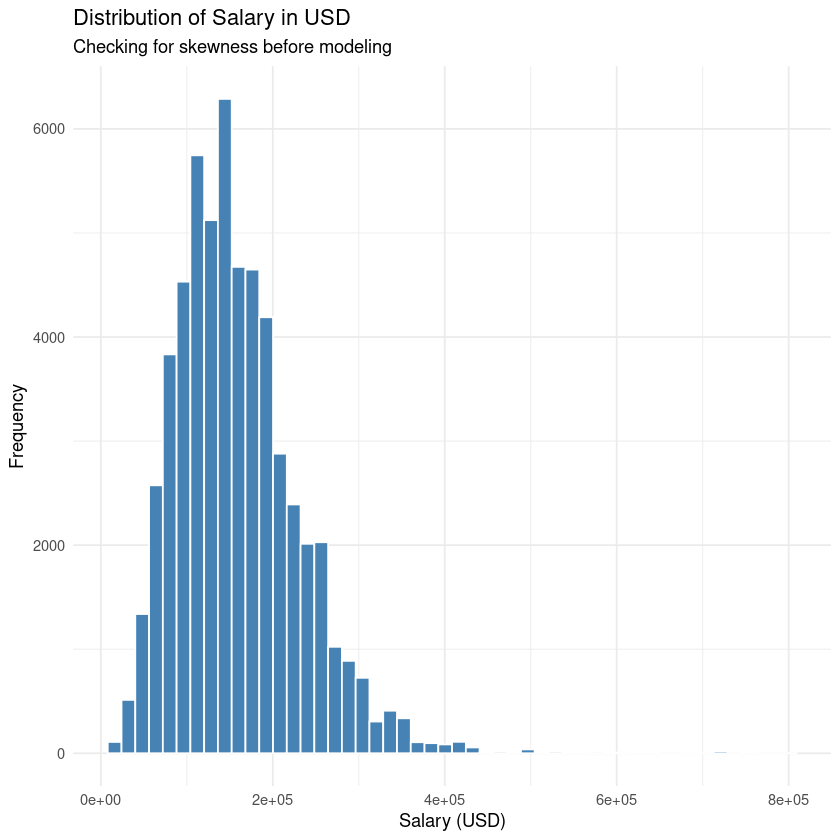

In [89]:
# Level 2
# Histogram visualization ~ variable salary_in_usd
library(ggplot2)

# Plot1 ~ Raw Distribution
ggplot(salaries_final, aes(x = salary_in_usd)) +
  geom_histogram(fill = "steelblue", color = "white", bins = 50) +
  theme_minimal() +
  labs(title = "Distribution of Salary in USD",
       subtitle = "Checking for skewness before modeling",
       x = "Salary (USD)", y = "Frequency")

# Salary variable skewness
library(e1071)
salary_skew <- skewness(salaries_final$salary_in_usd)
salary_skew

In [90]:
# Level 2
# Data transformation
salaries_final <- salaries_final %>%
  mutate(log_salary = log(salary_in_usd))

# Checking new skewness
new_skew <- skewness(salaries_final$log_salary)
new_skew

[1] -0.5126688

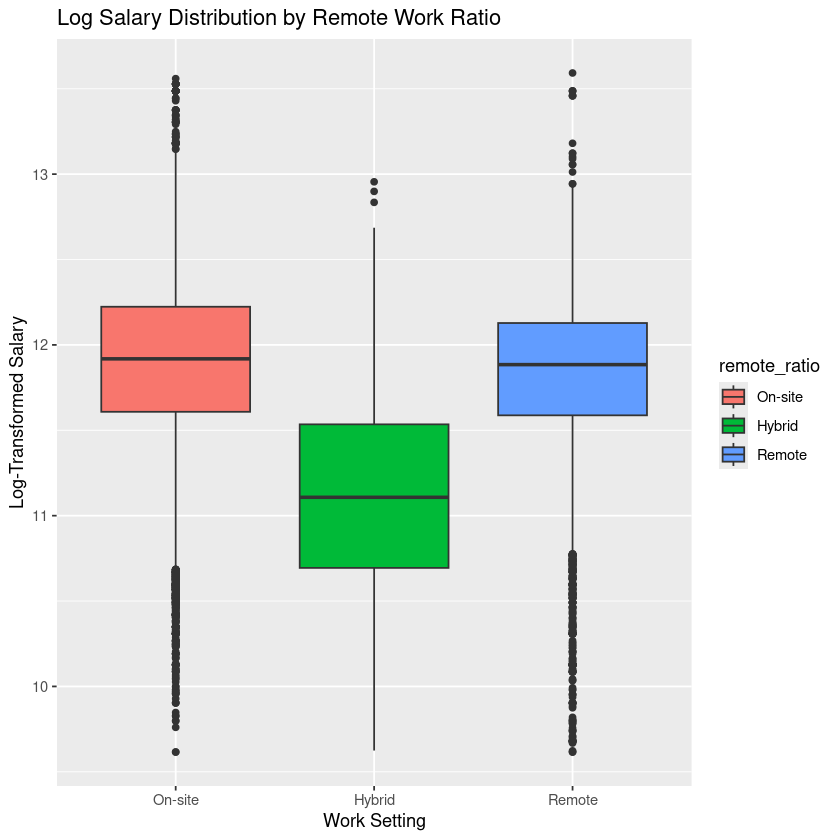

In [91]:
# Lelvel 2
# Boxplot visualization
ggplot(salaries_final, aes(x = remote_ratio, y = log_salary, fill = remote_ratio)) + 
  geom_boxplot() + labs(title = "Log Salary Distribution by Remote Work Ratio",
       x = "Work Setting",
       y = "Log-Transformed Salary")

In [92]:
# Level 2
# Percentage of people living in the same country as the company they work for
location_match <- salaries_final %>%
  mutate(match = (employee_residence == company_location)) %>%
  summarise(pct_match = mean(match) * 100)
location_match

pct_match
<dbl>
99.75872


In [93]:
# Level 2
# Feature engineering

library(rsample) # For splitting data

# 1. Creating a residence binary variable
salaries_final_model <- salaries_final %>%
  mutate(
    is_us_based = if_else(company_location == "US", "US", "Non-US"),
    is_us_based = as.factor(is_us_based)
  ) %>%
  # Select Variables
  select(log_salary, experience_level, company_size, 
         remote_ratio, job_category, is_us_based)

# 2. Split into Training (80%) and Testing (20%)
set.seed(123)
salary_split <- initial_split(salaries_final_model, prop = 0.8)
train_data <- training(salary_split)
test_data  <- testing(salary_split)

# 3. Train the "Winner" Model
# We predict log_salary using our refined features
final_model <- lm(log_salary ~ ., data = train_data)

# 4. Check the R-Squared
summary(final_model)


Call:
lm(formula = log_salary ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0730 -0.2549  0.0034  0.2668  2.6180 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  11.109294   0.013572 818.572   <2e-16 ***
experience_level.L            0.422395   0.009627  43.878   <2e-16 ***
experience_level.Q           -0.015860   0.007410  -2.140   0.0323 *  
experience_level.C            0.001399   0.004261   0.328   0.7426    
company_size.L                0.212771   0.023433   9.080   <2e-16 ***
company_size.Q               -0.151403   0.013947 -10.855   <2e-16 ***
remote_ratioHybrid           -0.353063   0.028256 -12.495   <2e-16 ***
remote_ratioRemote           -0.075836   0.004504 -16.838   <2e-16 ***
job_categoryData Engineering  0.292950   0.005893  49.715   <2e-16 ***
job_categoryData Science      0.312909   0.006203  50.444   <2e-16 ***
job_categoryLeadership        0.271987   0.009261  29.3

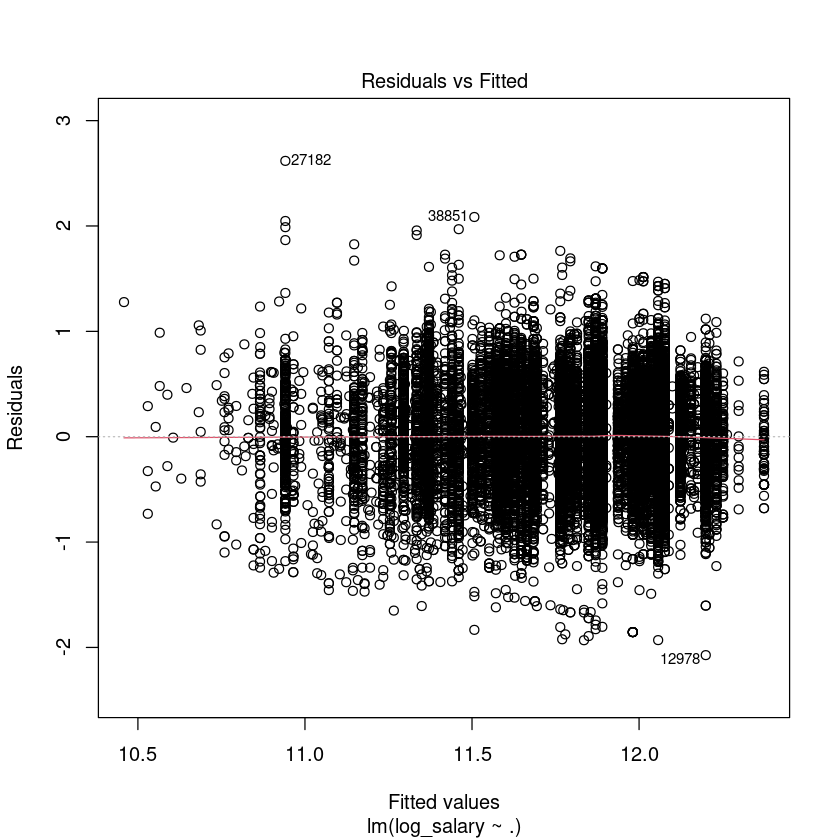

In [94]:
# Diagnostic plot
plot(final_model, which = 1)

In [95]:
# Calculating Mean Absolute Error ~ MAE
# 1. Get predictions from your model on the test set
log_preds <- predict(final_model, newdata = test_data)

# 2. Convert predictions and actuals back to original USD
actual_usd <- exp(test_data$log_salary)
predicted_usd <- exp(log_preds)

# 3. Calculate Mean Absolute Error
mae <- mean(abs(actual_usd - predicted_usd))
round(mae,2)

[1] 46972.52